**Королев Егор Владимирович  
М8О-401Б-18  
Лабораторная работа #3  
Вариант №1**

# Постановка задачи

Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$. Исследовать зависимость погрешности от сеточных параметров $h_x, h_y$.

Исходное уравнение с граничными условиями:

$$
\left\{
\begin{aligned}
& \dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2} = 0\\
& u(0,y) = y\\
& u(1,y) = 1 + y\\
& u(x,0) = x\\
& u(x,1) = 1 + x\\
\end{aligned}
\right.
$$

Аналитическое решение системы:

$$u(x,y) = x + y$$

# Решение

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Функции, задающие начально-краевые условия и аналитическое решение:

In [2]:
def condition_1(y):
    return y

def condition_2(y):
    return 1 + y

def condition_3(x):
    return x

def condition_4(x):
    return 1 + x

def analytical_solution(x, y):
    return x + y

Построим конечно-разностную схему по $x\in[0,1]$ и $y\in[0,1]$ с шагами $h_x,~h_y$, соответственно. Тогда количество шагов определяются следующими соотношениями: $h_x = 1 / N_x,~~ h_y = 1 / N_y$.

Пусть $u_i^k = u(x_i,y_k)$

## Конечно-разностная схема

Обозначим $u_{i,j}^{(k)}$ -- приближенное значение искомой функции в узле конечно-разностной схемы $(i,j)$ на итерации $k$.

Аппроскимируем производные:

$$
\begin{aligned}
& u_{yy}(x_i,y_j) = \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h_y^2}\\
& u_{xx}(x_i,y_j) = \dfrac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_x^2}\\
\end{aligned}
$$

Подставим полученные выражения в исходное уравнение:

$$\dfrac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_x^2} + \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h_y^2} + O(h_x^2 + h_y^2) = 0$$

### Метод Либмана

Выразив из (4) $u_{i,j}$, получим:

$$u_{i,j} = \dfrac{h_y^2}{h_x^2 + h_y^2}\dfrac{u_{i+1,j} + u_{i-1,j}}{2} + \dfrac{h_x^2}{h_x^2 + h_y^2}\dfrac{u_{i,j+1} + u_{i,j-1}}{2}$$

В итеративной форме:

$$u_{i,j}^{(k+1)} = \dfrac{h_y^2}{h_x^2 + h_y^2}\dfrac{u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)}}{2} + \dfrac{h_x^2}{h_x^2 + h_y^2}\dfrac{u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)}}{2}$$

Процесс Либмана прекращается, когда $||u^{(k+1)} - u^{(k)}|| < \varepsilon$, $||u^{(k)}||=\max\limits_{i,j}u_{i,j}^{(k)}$, где $\varepsilon$ -- заданная точность

### Метод верхних релаксаций

Материал взят с http://www.itlab.unn.ru/uploads/num/Relax.pdf

Метод верхних релаксаций применяется при решении большого числа СЛАУ с похожими матрицами коэффициентов $(a_{ij})_{i=1,j=1}^{m,n}$ и векторами свободных членов b. Это обуславливается наличаем параметра $w$, запуская метод с разными значениями параметра на одной системе выбирается тот $w$, на котором время работы минимально.

Общая форма вычислений:

$$x_j := x_j + w \dfrac{f_j}{a_{jj}} - w \sum\limits_{k = 1}^m \dfrac{a_{jk}}{a_{jj}}x_k$$

Оценка погрешности:

$$ || x_i^{(k+1)} - x_i^{(k)} || = \dfrac{w}{|a_{ii}|} || \sum\limits_{j=1}^m a_{ij}x_j^{(k)} -f_i || < \varepsilon $$

## Программная реализация метода Либмана

In [32]:
def liebman_method(
        x_begin = 0.0, x_end = 1.0,
        y_begin = 0.0, y_end = 1.0,
        N_x = 30, N_y = 30,
        epsilon = 1e-5,
        max_iter = 10**4):
    
    h_x = (x_end - x_begin) / (N_x - 1)
    h_y = (y_end - y_begin) / (N_y - 1)
    
    x = np.linspace(x_begin, x_end, N_x)
    y = np.linspace(y_begin, y_end, N_y)
    
    X = [x for _ in range(N_y)]
    Y = [[y[i] for _ in x] for i in range(N_y)]
    ans = [[0 for _ in range(N_x)] for _ in range(N_y)]
    for i in range(N_x):
        coeff = (condition_4(X[-1][i]) - condition_3(X[0][i])) / (y_end - y_begin)
        bias = condition_3(X[0][i])
        for j in range(N_y):
            ans[j][i] = coeff * (Y[j][i] - y_begin) + bias
    
    coeffs = [h_x*h_x / (h_x*h_x + h_y*h_y), h_y*h_y / (h_x*h_x + h_y*h_y)]
    
    #print(coeffs)
    iter_number = 0
    norm = 2 * epsilon
    
    while(norm >= epsilon and iter_number < max_iter):
        last_line = [[0 for _ in range(N_x)] for _ in range(N_y)]
        norm = 0
        for i in range(1, N_y - 1):
            last_line[i][0] = condition_1(Y[i][0])
            diff = abs(last_line[i][0] - ans[i][0])
            norm = max(diff, norm)
            for j in range(1, N_x - 1):
                last_line[i][j] = (coeffs[0] * (ans[i][j-1] + ans[i][j+1]) / 2 + coeffs[1] * (ans[i-1][j] + ans[i+1][j]) / 2)
                diff = abs(last_line[i][j] - ans[i][j])
                norm = max(diff, norm)
            last_line[i][-1] = condition_2(Y[i][-1])
            diff = abs(last_line[i][-1] - ans[i][-1])
            norm = max(diff, norm)
        
        for i in range(1, N_y - 1):
            ans[i] = last_line[i]
            
        iter_number += 1
        
    return X, Y, ans

## Программная реализация метода верхних релаксаций

In [40]:
def relaxation_method(
        x_begin = 0.0, x_end = 1.0,
        y_begin = 0.0, y_end = 1.0,
        N_x = 30, N_y = 30,
        epsilon = 1e-5,
        w = 0.01,
        max_iter = 10**4):
    
    h_x = (x_end - x_begin) / (N_x - 1)
    h_y = (y_end - y_begin) / (N_y - 1)
    
    x = np.linspace(x_begin, x_end, N_x)
    y = np.linspace(y_begin, y_end, N_y)
    
    X = [x for _ in range(N_y)]
    Y = [[y[i] for _ in x] for i in range(N_y)]
    ans = [[0 for _ in range(N_x)] for _ in range(N_y)]
    for i in range(N_x):
        coeff = (condition_4(X[-1][i]) - condition_3(X[0][i])) / (y_end - y_begin)
        bias = condition_3(X[0][i])
        for j in range(N_y):
            ans[j][i] = coeff * (Y[j][i] - y_begin) + bias
    
    coeffs = [h_x*h_x / (h_x*h_x + h_y*h_y), h_y*h_y / (h_x*h_x + h_y*h_y)]
    
    iter_number = 0
    norm = 2 * epsilon
    
    while(norm >= epsilon and iter_number < max_iter):
        norm = 0
        for i in range(1, N_y - 1):
            diff = w * (condition_1(Y[i][0]) - ans[i][0])
            ans[i][0] += diff
            diff = abs(diff)
            norm = max(diff, norm)
            for j in range(1, N_x - 1):
                diff = w * (coeffs[0] * (ans[i][j-1] + ans[i][j+1]) / 2 + coeffs[1] * (ans[i-1][j] + ans[i+1][j]) / 2 - ans[i][j])
                ans[i][j] += diff
                diff = abs(diff)
                norm = max(diff, norm)
            diff = w * (condition_2(Y[i][-1]) - ans[i][-1])
            ans[i][-1] += diff
            diff = abs(diff)
            norm = max(diff, norm)
        
        iter_number += 1
    return X, Y, ans

## Программная реализация метода зейделя

In [5]:
def zeidel_method(
        x_begin = 0.0, x_end = 1.0,
        y_begin = 0.0, y_end = 1.0,
        N_x = 30, N_y = 30,
        epsilon = 1e-5):
    return relaxation_method(x_begin, x_end, y_begin, y_end, N_x, N_y, epsilon, w=1.0)

# Вычисление погрешностей методов

Вычисление ошибки (норма матрицы ошибки):

In [6]:
def norm_matrix_error(x, y, approx, real_func):
    ans = 0.0
    for i in range(len(approx)):
        for j in range(len(approx[i])):
            ans += (approx[i][j] - real_func(x[i][j], y[i][j]))**2
    return ans**0.5

In [30]:
def error_plot_data(solver, real_f):
    h, e = [], []
    for N in range(5, 20):
        x, y, ans = solver(N_x=N, N_y=N)
        h.append(1.0 / N)
        e.append(norm_matrix_error(x, y, ans, real_f))
    return h, e

In [8]:
def construct_error_plot(method, method_name):
    plt.figure(figsize = (16, 8))

    plt.title("Зависимость погрешности от длины шага")
    h, e = error_plot_data(method, analytical_solution)
    
    plt.plot(h, e, label=method_name, color = "blue")
    plt.xlabel("мелкость разбиения")
    plt.ylabel("ошибка")
    plt.legend()
    plt.grid()

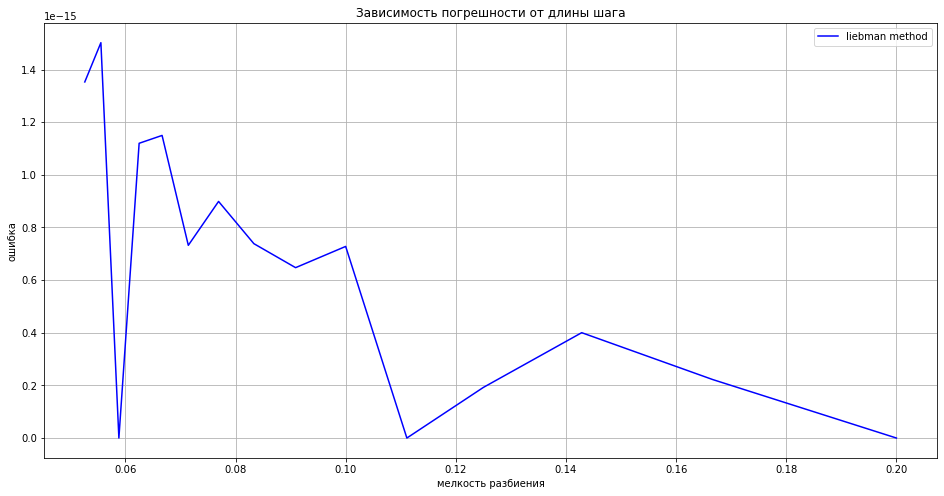

In [37]:
construct_error_plot(liebman_method, "liebman method")

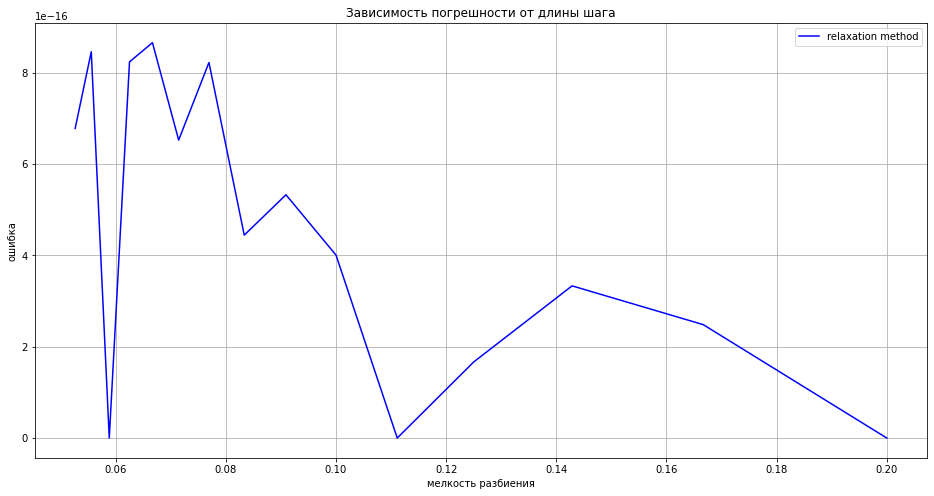

In [38]:
construct_error_plot(relaxation_method, "relaxation method")

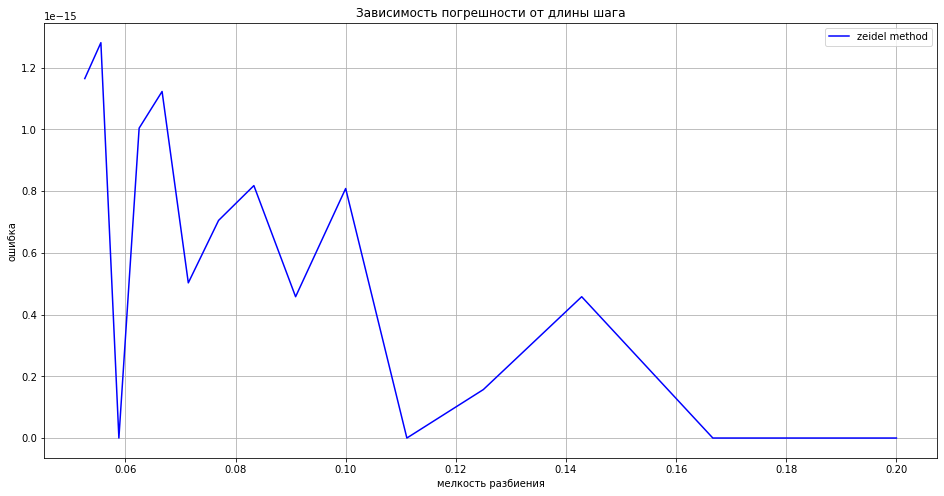

In [39]:
construct_error_plot(zeidel_method, "zeidel method")

In [12]:
def construct_3d_plot(method, method_name):
    X_e, Y_e, Z_e = method()
    z_plot = []
    for j in range(0, len(X_e), 1):
        tmp = []
        for i in range(0, len(X_e[j]), 1):
            tmp.append(analytical_solution(X_e[j][i], Y_e[j][i]))
        z_plot.append(tmp)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_e, Y_e, Z_e, label="alalytical")
    ax.scatter(X_e, Y_e, z_plot, label=method_name)

    plt.legend()
    plt.grid()

    print("Total error = ", norm_matrix_error(X_e, Y_e, Z_e, analytical_solution))

Total error =  2.6057740907322797e-15


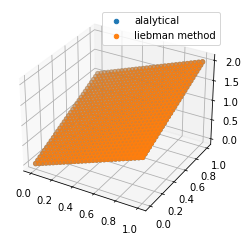

In [26]:
construct_3d_plot(liebman_method, "liebman method")

Total error =  1.897809681975137e-15


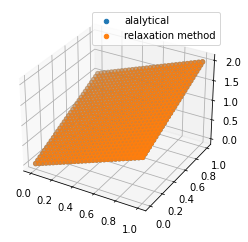

In [14]:
construct_3d_plot(relaxation_method, "relaxation method")

Total error =  2.6452388689771864e-15


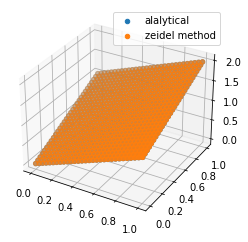

In [15]:
construct_3d_plot(zeidel_method, "zeidel method")

# Выводы

Используя различные итерационные методы решения СЛАУ, была решена задача Лапласа. Для проверки точности реализованных методов были построены графики суммарной ошибки от мелкости разбиения, также были построены графики аналитического решения и приближенного.